In [90]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import datetime
import seaborn as sns

sns.set_style("whitegrid")

In [91]:
#upload media_train.csv and markets_train.csv and clean data

media_train= pd.read_csv("media_train.csv", index_col = 0, parse_dates = ['pub_date'])

markets_train = pd.read_csv("markets_train.csv", parse_dates = ['Date'])

media_train = media_train.loc[media_train['relevance_rank'] <= 2]

In [92]:
media_train.head()

,pub_date,word_count,type_of_material,_id,abstract,lead_paragraph,snippet,headline.main,text,relevance_rank,keyword_counts,polarity,subjectivity,finbert-sentiment-score,finbert-bin
2,2021-04-12 16:50:18+00:00,607,Letter,nyt://article/02b7abdf-e925-5941-b577-9c2737ba...,Readers discuss formative experiences in the w...,To the Editor:,Readers discuss formative experiences in the w...,My Job and I: Is This a Love Letter?,Readers discuss formative experiences in the w...,1,2,0.500000,0.600000,0.000000,0
3,2020-10-21 11:56:39+00:00,2057,News,nyt://article/0322b0d5-4d0a-50bf-93f5-2fe37e9d...,What you need to know about the antitrust case...,"This Nov. 17 and 18, DealBook opens its doors ...",What you need to know about the antitrust case...,What Did Google Do?,What you need to know about the antitrust case...,2,1,0.306250,0.682292,0.000000,0
4,2020-06-04 22:04:38+00:00,1268,News,nyt://article/044a14cb-41a2-54a5-aef6-273f5b33...,"To placate European regulators, the company st...","OAKLAND, Calif. — For the last few months, som...","To placate European regulators, the company st...",Google’s European Search Menu Draws Interest o...,"To placate European regulators, the company st...",1,3,-0.023580,0.137027,0.000000,0
6,2020-10-08 21:38:26+00:00,775,News,nyt://article/04d8f98c-5431-5cbd-a25a-9181dd9d...,"The complaint says the contractor, HCL, refuse...",A federal agency issued a complaint this week ...,"The complaint says the contractor, HCL, refuse...",Labor Board Accuses Google Contractor of Viola...,"The complaint says the contractor, HCL, refuse...",1,2,-0.100000,0.375000,-0.955172,-2
11,2020-10-22 09:00:11+00:00,936,Op-Ed,nyt://article/093473a5-d259-588e-a150-a0d9c4c2...,The Justice Department is demanding that the c...,The true significance of the federal antitrust...,The Justice Department is demanding that the c...,"Google, You Can’t Buy Your Way Out of This",The Justice Department is demanding that the c...,2,2,0.120833,0.495833,0.000000,0


In [93]:
markets_train.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,AdjClose
0,2020-01-02 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,27278000,0,0,68.433998
1,2020-01-03 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,23408000,0,0,68.075996
2,2020-01-06 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,46768000,0,0,69.890503
3,2020-01-07 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,34330000,0,0,69.755501
4,2020-01-08 00:00:00-05:00,69.740997,70.592499,69.631500,70.251999,35314000,0,0,70.251999


In [94]:
#changing the format of date and sorting the media_data by pub_date
media_train['pub_date'] = [date.strftime('%Y-%m-%d') for date in media_train['pub_date']]
markets_train['Date'] = [date.strftime('%Y-%m-%d') for date in markets_train['Date']]
media_train.sort_values(by='pub_date')

,pub_date,word_count,type_of_material,_id,abstract,lead_paragraph,snippet,headline.main,text,relevance_rank,keyword_counts,polarity,subjectivity,finbert-sentiment-score,finbert-bin
221,2020-01-10,844,News,nyt://article/d9afe9e5-7de6-5165-8723-56a5516f...,"David Drummond, who played a key role for the ...","SAN FRANCISCO — David Drummond, the chief lega...","David Drummond, who played a key role for the ...",Alphabet’s Chief Legal Officer Stepping Down A...,"David Drummond, who played a key role for the ...",2,1,0.082716,0.465432,-0.805403,-1
126,2020-01-16,921,News,nyt://article/84c99031-8033-5a07-8f88-8ad03088...,The internet search giant became the fourth te...,SAN FRANCISCO — Numbers have long held a speci...,The internet search giant became the fourth te...,"Google Reaches $1 Trillion in Value, Even as I...",The internet search giant became the fourth te...,1,2,0.063358,0.489425,0.515036,1
87,2020-01-24,861,News,nyt://article/52b9f824-38c3-59d1-bf96-374c7dab...,The tech giant has begun charging U.S. law enf...,Facing an increasing number of requests for it...,The tech giant has begun charging U.S. law enf...,Have a Search Warrant for Data? Google Wants Y...,The tech giant has begun charging U.S. law enf...,1,2,0.045833,0.529167,0.000000,0
71,2020-01-31,1151,News,nyt://article/3d5e6a52-ab1a-514b-8898-5e43b795...,"The internet giant, which some lawmakers and r...","SAN FRANCISCO — A couple of weeks ago, when Da...","The internet giant, which some lawmakers and r...",Why Google Backtracked on Its New Search Resul...,"The internet giant, which some lawmakers and r...",2,2,0.147273,0.890909,0.000000,0
234,2020-02-04,1491,News,nyt://article/e0346020-e247-5404-989d-72359e9a...,Alphabet unexpectedly disclosed how much reven...,Silicon Valley is buzzing over Sheryl Sandber...,Alphabet unexpectedly disclosed how much reven...,A Peek Inside YouTube’s Money Machine,Alphabet unexpectedly disclosed how much reven...,2,0,0.100000,0.419048,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2021-09-10,1514,News,nyt://article/ce205347-332e-5ad4-8c0f-1366f077...,The company realized months ago that it could ...,"In December, a group of Google managers respon...",The company realized months ago that it could ...,Google Could Be Violating Labor Laws With Pay ...,The company realized months ago that it could ...,1,2,-0.080000,0.270000,-0.956777,-2
26,2021-09-21,1445,News,nyt://article/1598fe61-4bfa-5bb7-bcaf-11d4f1ab...,The technology giant has built a sprawling cam...,Google announced on Tuesday that it would spen...,The technology giant has built a sprawling cam...,Google to Spend $2.1 Billion on Manhattan Offi...,The technology giant has built a sprawling cam...,1,2,0.050000,0.637500,0.000000,0
169,2021-11-03,1302,News,nyt://article/a5f78e5e-b7ea-5778-a611-3fcbcf1c...,"Three years ago, the company walked away from ...",Three years after an employee revolt forced Go...,"Three years ago, the company walked away from ...","Google Wants to Work With the Pentagon Again, ...","Three years ago, the company walked away from ...",1,2,-0.066396,0.401299,-0.479466,0
249,2021-11-05,847,News,nyt://article/eff809ea-45d1-5c46-977e-a88e0a57...,When a Google staffing agency reneged on a pro...,"Ned McNally, a temp worker at Google’s data ce...",When a Google staffing agency reneged on a pro...,Google Temps Fought Loss of Pandemic Bonus. An...,When a Google staffing agency reneged on a pro...,1,4,-0.087500,0.262500,-0.729261,-1


In [95]:
#pub_date is in Year-Month-Day format
media_train.head()

,pub_date,word_count,type_of_material,_id,abstract,lead_paragraph,snippet,headline.main,text,relevance_rank,keyword_counts,polarity,subjectivity,finbert-sentiment-score,finbert-bin
2,2021-04-12,607,Letter,nyt://article/02b7abdf-e925-5941-b577-9c2737ba...,Readers discuss formative experiences in the w...,To the Editor:,Readers discuss formative experiences in the w...,My Job and I: Is This a Love Letter?,Readers discuss formative experiences in the w...,1,2,0.500000,0.600000,0.000000,0
3,2020-10-21,2057,News,nyt://article/0322b0d5-4d0a-50bf-93f5-2fe37e9d...,What you need to know about the antitrust case...,"This Nov. 17 and 18, DealBook opens its doors ...",What you need to know about the antitrust case...,What Did Google Do?,What you need to know about the antitrust case...,2,1,0.306250,0.682292,0.000000,0
4,2020-06-04,1268,News,nyt://article/044a14cb-41a2-54a5-aef6-273f5b33...,"To placate European regulators, the company st...","OAKLAND, Calif. — For the last few months, som...","To placate European regulators, the company st...",Google’s European Search Menu Draws Interest o...,"To placate European regulators, the company st...",1,3,-0.023580,0.137027,0.000000,0
6,2020-10-08,775,News,nyt://article/04d8f98c-5431-5cbd-a25a-9181dd9d...,"The complaint says the contractor, HCL, refuse...",A federal agency issued a complaint this week ...,"The complaint says the contractor, HCL, refuse...",Labor Board Accuses Google Contractor of Viola...,"The complaint says the contractor, HCL, refuse...",1,2,-0.100000,0.375000,-0.955172,-2
11,2020-10-22,936,Op-Ed,nyt://article/093473a5-d259-588e-a150-a0d9c4c2...,The Justice Department is demanding that the c...,The true significance of the federal antitrust...,The Justice Department is demanding that the c...,"Google, You Can’t Buy Your Way Out of This",The Justice Department is demanding that the c...,2,2,0.120833,0.495833,0.000000,0


In [96]:
#Date is in Year-Month-Day format
markets_train.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,AdjClose
0,2020-01-02,67.420502,68.433998,67.324501,68.433998,27278000,0,0,68.433998
1,2020-01-03,67.400002,68.687500,67.365997,68.075996,23408000,0,0,68.075996
2,2020-01-06,67.581497,69.916000,67.550003,69.890503,46768000,0,0,69.890503
3,2020-01-07,70.023003,70.175003,69.578003,69.755501,34330000,0,0,69.755501
4,2020-01-08,69.740997,70.592499,69.631500,70.251999,35314000,0,0,70.251999


In [97]:
markets_train.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,AdjClose
500,2021-12-27,147.255997,148.343994,147.169495,147.906494,15976000,0,0,147.906494
501,2021-12-28,148.235992,148.298996,146.054504,146.686996,18200000,0,0,146.686996
502,2021-12-29,146.644501,147.417007,145.647507,146.654999,17788000,0,0,146.654999
503,2021-12-30,146.694000,147.300003,145.994507,146.200501,15688000,0,0,146.200501
504,2021-12-31,146.050003,146.698502,144.852005,144.852005,18136000,0,0,144.852005


In [98]:
media_train.columns

Index(['pub_date', 'word_count', 'type_of_material', '_id', 'abstract',
       'lead_paragraph', 'snippet', 'headline.main', 'text', 'relevance_rank',
       'keyword_counts', 'polarity', 'subjectivity', 'finbert-sentiment-score',
       'finbert-bin'],
      dtype='object')

In [99]:
# Set h
h=3

In [100]:
# Looping through all days in 2022, recording average polarity, sentiment, closing stock price on that day
# and closing stock price on day + h (given it's NOT a weekend)

Date = []
Average_Rank = []
Average_Polarity = []
Average_Subjectivity = []
Average_FinBert = []
Close = []
Close_h = [] # Closing stock price after date + 4 days (given it's a not weekend)

delta = datetime.timedelta(days = 1)
start_date = datetime.date(2020, 1, 2)
end_date = datetime.date(2021, 12, 31) - h * delta

while (start_date <= end_date):
    if str(start_date) not in media_train.pub_date.values:
        start_date += delta
        continue
        
    Date.append(str(start_date))
    Average_Rank.append(media_train['relevance_rank'].loc[media_train.pub_date == str(start_date)].mean())
    Average_Polarity.append(media_train['polarity'].loc[media_train.pub_date == str(start_date)].mean())
    Average_Subjectivity.append(media_train['subjectivity'].loc[media_train.pub_date == str(start_date)].mean())
    Average_FinBert.append(media_train['finbert-sentiment-score'].loc[media_train.pub_date == str(start_date)].mean())
    
    date1 = start_date
    while str(date1) not in markets_train.Date.values:
        date1 -= delta 
    Close.append(markets_train['Close'].loc[markets_train.Date == str(date1)].item())
    
    date2 = start_date + h * delta
    while str(date2) not in markets_train.Date.values:
        date2 += delta 
    Close_h.append(markets_train['Close'].loc[markets_train.Date == str(date2)].item())
    
    start_date += delta

In [101]:
Change_Price_Scaled = [(Close_h[i]-Close[i])/Close[i] for i in range(len(Close))]
df_train = pd.DataFrame({'Pub_Date' : Date, 'Average_Rank' : Average_Rank, 'Average_Polarity' : Average_Polarity,
                         'Average_Subjectivity' : Average_Subjectivity, 'Average_FinBert' : Average_FinBert,
                         'Close' : Close, 'Close_h' : Close_h, 
                         'Change_Price_Scaled': Change_Price_Scaled})

# Adding extra columns
df_train['Inter_Pol_Sub'] = df_train['Average_Polarity'] * df_train['Average_Subjectivity']
df_train['Average_FinBert_cub'] = df_train['Average_FinBert']**3

In [102]:
print(df_train)

      Pub_Date  Average_Rank  Average_Polarity  Average_Subjectivity  \
0   2020-01-10           2.0          0.082716              0.465432   
1   2020-01-16           1.0          0.063358              0.489425   
2   2020-01-24           1.0          0.045833              0.529167   
3   2020-01-31           2.0          0.147273              0.890909   
4   2020-02-04           2.0          0.125000              0.396429   
..         ...           ...               ...                   ...   
58  2021-09-10           1.0         -0.080000              0.270000   
59  2021-09-21           1.0          0.050000              0.637500   
60  2021-11-03           1.0         -0.066396              0.401299   
61  2021-11-05           1.0         -0.087500              0.262500   
62  2021-12-16           2.0          0.006981              0.450649   

    Average_FinBert       Close     Close_h  Change_Price_Scaled  \
0         -0.805403   71.447998   72.001503             0.007747   

In [103]:
print("Corr. b/w Change_Price and Average Polarity", df_train['Change_Price_Scaled'].corr(df_train['Average_Polarity']))
print("Corr. b/w Change_Price and Average FinBert", df_train['Change_Price_Scaled'].corr(df_train['Average_FinBert']))
print("Spearman Corr. b/w Change_Price and Average FinBert", df_train['Change_Price_Scaled'].corr(df_train['Average_FinBert'], method='spearman'))

Corr. b/w Change_Price and Average Polarity 0.08306956307675732
Corr. b/w Change_Price and Average FinBert 0.07756612830105135
Spearman Corr. b/w Change_Price and Average FinBert 0.21975452874872


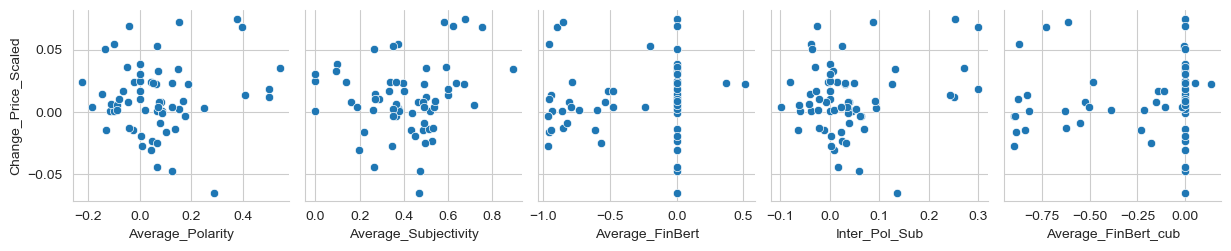

In [104]:
sns.pairplot(df_train, x_vars = ['Average_Polarity', 'Average_Subjectivity', 'Average_FinBert', 'Inter_Pol_Sub',
                                 'Average_FinBert_cub'], y_vars = ['Change_Price_Scaled'])
plt.show()

In [105]:
## import KFold
from sklearn.model_selection import KFold

In [106]:
kfold = KFold(n_splits=5,
              shuffle=True,
              random_state=758)

In [107]:
## importing mean_squared_error
from sklearn.metrics import mean_squared_error

In [108]:
## import LinearRegression
from sklearn.linear_model import LinearRegression

In [109]:
#Decision Tree and Random Forest

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [112]:
## make an array of zeros that will hold our mses
mses = np.zeros((5, 5))

## This keeps track of what split we are on
i = 0
## fill in what is missing in the for loop declaration
for train_index, test_index in kfold.split(df_train):
    ## now we get the training splits and the holdout split
    ### Training
    df_t_t = df_train.iloc[train_index].copy()
    
    ### Holdout set
    df_ho = df_train.iloc[test_index].copy()
    
    
    ### This is Model 0 ###
    ## take the mean Change_Price from the training set
    ## we need predictions for the entire holdout set
    pred0 = df_t_t.Change_Price_Scaled.mean() * np.ones(len(df_ho))
    
    ### This is Model 1 ###
    ## W = beta_0 + beta_1 * Average_Polarity + epsilon
    ## Define the LinearRegression object
    model1 = LinearRegression(copy_X=True)
    
    ## fit model1 on the training data, Co_t_t
    ## don't forget you may need to reshape the data
    model1.fit(df_t_t[['Average_Polarity', 'Average_Subjectivity', 'Inter_Pol_Sub']],
               df_t_t.Change_Price_Scaled.values)
    
    ## get the prediction on holdout set
    pred1 = model1.predict(df_ho[['Average_Polarity', 'Average_Subjectivity', 'Inter_Pol_Sub']])
    
    ### This is Model 1 ###
    ## W = beta_0 + beta_1 * Average_Polarity + epsilon
    ## Define the LinearRegression object
    model2 = LinearRegression(copy_X=True)
    
    ## fit model1 on the training data, Co_t_t
    ## don't forget you may need to reshape the data
    model2.fit(df_t_t.Average_FinBert.values.reshape(-1,1),
               df_t_t.Change_Price_Scaled.values)
    
    ## get the prediction on holdout set
    pred2 = model2.predict(df_ho.Average_FinBert.values.reshape(-1,1))
    
    ### This is Model 2 ###
    ## Define the DecisionTreeRegression object
    model3 = DecisionTreeRegressor(random_state=420)
    
    ## fit model1 on the training data, Co_t_t
    ## don't forget you may need to reshape the data
    model3.fit(df_t_t[['Average_Polarity', 'Average_Subjectivity']],
               df_t_t.Change_Price_Scaled.values)
    
    ## get the prediction on holdout set
    pred3 = model3.predict(df_ho[['Average_Polarity', 'Average_Subjectivity']])
    
    ### This is Model 3 ###
    ## Define the DecisionTreeRegression object
    model4 = RandomForestRegressor(random_state=222)
    
    ## fit model1 on the training data, Co_t_t
    ## don't forget you may need to reshape the data
    model4.fit(df_t_t[['Average_Polarity', 'Average_Subjectivity']],
               df_t_t.Change_Price_Scaled.values)
    
    ## get the prediction on holdout set
    pred4 = model4.predict(df_ho[['Average_Polarity', 'Average_Subjectivity']])
    
    ### Recording the MSES ###
    ## mean_squared_error takes in the true values, then the predicted values
    ## model 0
    mses[0,i] = mean_squared_error(df_ho.Change_Price_Scaled.values, pred0)
    
    ## model 1
    mses[1,i] = mean_squared_error(df_ho.Change_Price_Scaled.values, pred1)
    
    ## model 2
    mses[2,i] = mean_squared_error(df_ho.Change_Price_Scaled.values, pred2)
    
    ## model 3
    mses[3,i] = mean_squared_error(df_ho.Change_Price_Scaled.values, pred3)
    
     ## model 4
    mses[4,i] = mean_squared_error(df_ho.Change_Price_Scaled.values, pred4)
    
    ## increase i by 1
    i = i + 1

In [113]:
mses.mean(axis = 1)

array([0.00078198, 0.00064814, 0.0008387 , 0.00105758, 0.00078638])